<a href="https://colab.research.google.com/github/raheldouaa/data-mining/blob/main/Faciale_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

d = fetch_olivetti_faces()
data, target = d['data'], d['target']

In [ ]:
images = d['images']

In [ ]:
import numpy as np

unique target number

In [ ]:
print(np.unique(target))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [ ]:
len(np.unique(target))

40

40 faces in data

In [ ]:
import matplotlib.pyplot as plt

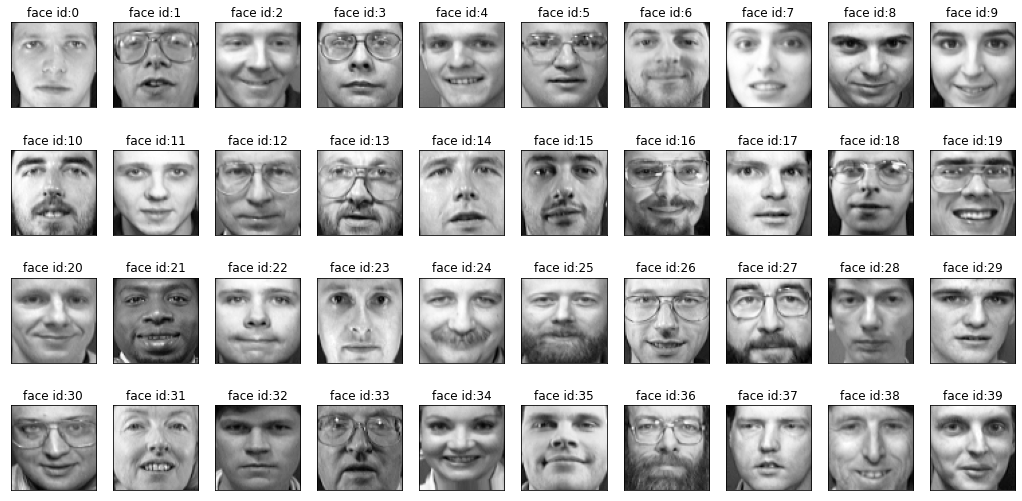

In [ ]:
fig, ax=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
ax=ax.flatten()

for unique_id in np.unique(target):
  image_index=unique_id*10
  ax[unique_id].imshow(images[image_index], cmap='gray')
  ax[unique_id].set_xticks([])
  ax[unique_id].set_yticks([])
  ax[unique_id].set_title("face id:{}".format(unique_id))

In [ ]:
data.shape

(400, 4096)

PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)
pca.fit(data)
data_pca=pca.transform(data)

Number of Principle Component

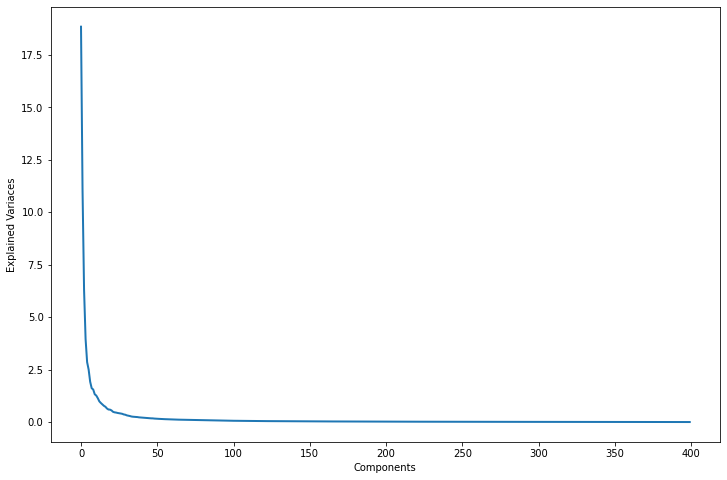

In [ ]:
pca=PCA()
pca.fit(data)
plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [ ]:
n_components=90

In [ ]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(data)

PCA(n_components=90, whiten=True)

Average Face

Text(0.5, 1.0, 'Average Face')

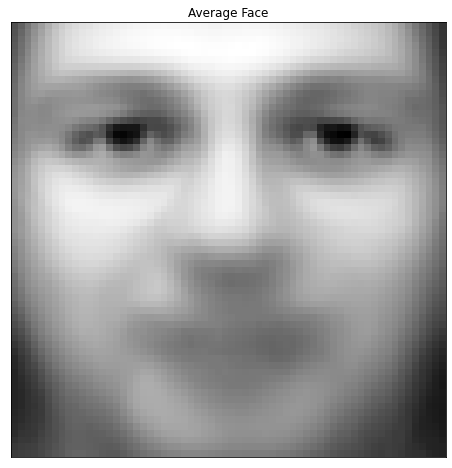

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Eigen Faces

In [ ]:
(pca.components_).shape

(90, 4096)

In [ ]:
number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_
eigen_faces_img = pca.components_.reshape((pca.components_.shape[0],64,64));

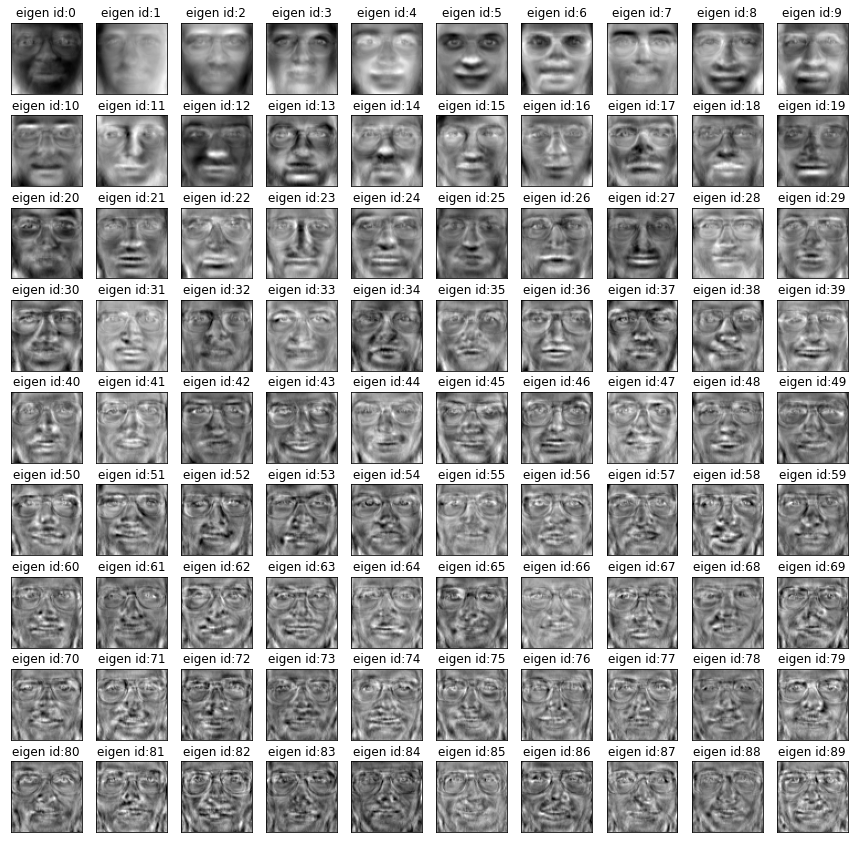

In [ ]:
cols=10
rows=int(number_of_eigenfaces/cols)
fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
ax=ax.flatten()
for i in range(number_of_eigenfaces):
    ax[i].imshow(eigen_faces_img[i],cmap="gray")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title("eigen id:{}".format(i))

In [ ]:
images.shape

(400, 64, 64)

In [ ]:
images[0].shape

(64, 64)

In [ ]:
img = images[0].ravel()

In [ ]:
img.shape

(4096,)

In [ ]:
print(img)

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]


In [ ]:
eigen_faces.shape

(90, 4096)

In [ ]:
(eigen_faces.T).shape

(4096, 90)

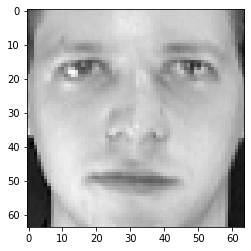

In [ ]:
plt.imshow(images[0], cmap='gray')

projecting ...

In [ ]:
projection = np.dot(img, eigen_faces.T)

In [ ]:
projection.shape

(90,)

In [ ]:
(pca.mean_).shape

(4096,)

calculate the weight vector for each input picture

In [ ]:
eigenfaces = pca.components_[:n_components]
weights = eigenfaces @ (img - pca.mean_).T

In [ ]:
weights

array([-6.43260813e+00, -7.03672409e-01, -1.43002141e+00,  1.27853668e+00,
        2.56439090e+00, -9.50614691e-01,  2.08177185e+00, -2.93794084e+00,
       -3.73890311e-01,  2.43130833e-01, -1.35430026e+00,  1.17257130e+00,
        3.92077833e-01,  3.58208805e-01,  7.54200518e-01,  2.70381272e-01,
        5.14703393e-01, -5.96435368e-01, -1.55800283e-01, -2.83121288e-01,
        1.35543674e-01,  7.36062884e-01, -1.24648467e-01,  4.25951272e-01,
        4.99358535e-01, -5.08068025e-01,  7.12952197e-01, -1.49602264e-01,
       -2.98994239e-02,  5.98532259e-01, -5.10107636e-01,  3.41922104e-01,
       -8.98106173e-02,  8.14257443e-01,  1.34903312e-01, -1.84737504e-01,
       -3.12211365e-01, -5.69153726e-01, -3.92825395e-01,  5.05426109e-01,
        2.76521981e-01,  1.82480142e-01,  1.98346712e-02,  5.63602209e-01,
       -4.77773160e-01,  2.74984181e-01, -3.02854121e-01,  2.81790525e-01,
        2.51372188e-01,  6.00927591e-01,  3.73463124e-01, -1.10653073e-01,
       -1.86379999e-01,  

In [ ]:
images[7].shape

(64, 64)

In [ ]:
(pca.mean_).shape

(4096,)

In [ ]:
images.shape

(400, 64, 64)

In [ ]:
facematrix = []
for i in range(400):
  facematrix.append(images[i].flatten())


In [ ]:
np.shape(facematrix)[0]

400

In [ ]:
weights = []
for i in range(np.shape(facematrix)[0]):
    weight = []
    for j in range(n_components):
        w = eigenfaces[j] @ (facematrix[i] - pca.mean_)
        weight.append(w)
    weights.append(weight)

In [ ]:
np.shape(weights)

(400, 90)

In [ ]:
weights_t = np.transpose(weights)
np.shape(weights_t)

(90, 400)

In [ ]:
a = list(map(list, zip(*weights)))
np.shape(a)

(90, 400)

In [ ]:
q_img = images[0].reshape(1,-1)
q_weight = eigenfaces @ (q_img - pca.mean_).T

In [ ]:
q_weight.shape

(90, 1)

In [ ]:
euclidean_distance = np.linalg.norm(weights_t - q_weight, axis=0)

In [ ]:
euclidean_distance.shape

(400,)

In [ ]:
type(euclidean_distance)

numpy.ndarray

In [ ]:
best_match = np.argmin(euclidean_distance)

In [ ]:
best_match

0

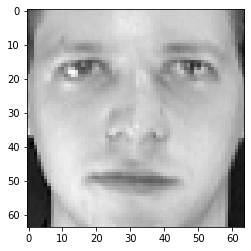

In [ ]:
plt.imshow(images[0], cmap='gray')

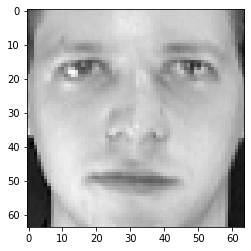

In [ ]:
plt.imshow(images[best_match], cmap='gray')

Find the index of the k smallest values of euclidean_distance

In [ ]:
index = np.argsort(euclidean_distance)

In [ ]:
index[:10]

array([  0,   2,   6, 151, 152, 159, 176, 178,   7, 179])

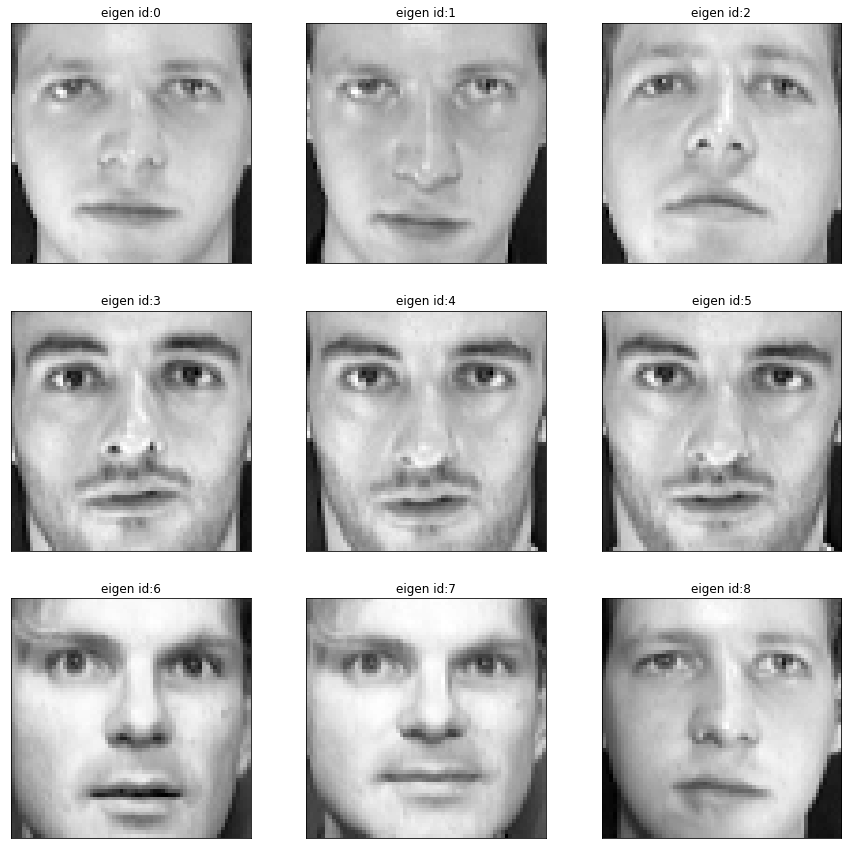

In [ ]:
cols=3
rows=3
fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
ax=ax.flatten()
for i in range(9):
    ax[i].imshow(images[index[i]],cmap="gray")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title("eigen id:{}".format(i))